## Objective:
-  The objective of this assignment is to implement PCA on a given dataset and analyse the results.
#### Deliverables:
- Jupyter notebook containing the code for the PCA implementation. 
(https://archive.ics.uci.edu/ml/datasets/Wine).
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.
#### Additional Information:
- You can use the python programming language.
- You can use any other machine learning libraries or tools as necessary.
- You can use any visualisation libraries or tools as necessary.
#### Instructions:
- Download the wine dataset from the UCI Machine Learning Repository
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [21]:
columns = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wine", "Proline", "extra"]   

In [22]:
df = pd.read_csv("wine.data", index_col=None, names=columns)
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wine,Proline,extra
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [23]:
df.isnull().sum()

Alcohol                        0
Malic acid                     0
Ash                            0
Alcalinity of ash              0
Magnesium                      0
Total phenols                  0
Flavanoids                     0
Nonflavanoid phenols           0
Proanthocyanins                0
Color intensity                0
Hue                            0
OD280/OD315 of diluted wine    0
Proline                        0
extra                          0
dtype: int64

In [24]:
y = df["Alcohol"]
X = df.drop("Alcohol", axis=1)

In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Alcohol, Length: 178, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
pca = PCA()

In [36]:
X_scaled = pca.fit_transform(X_scaled)
X_scaled

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [32]:
explained_var = pca.explained_variance_ratio_

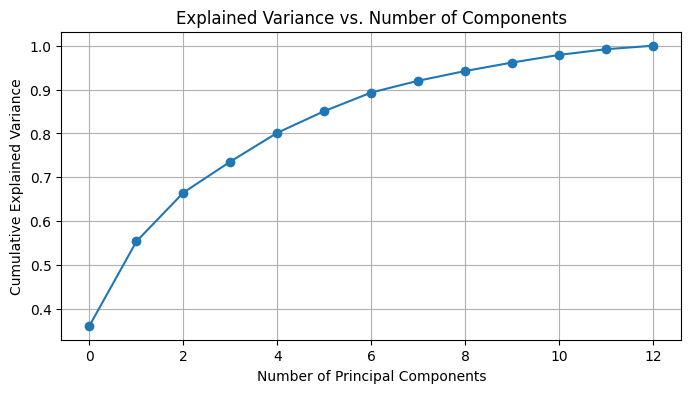

In [33]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [38]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

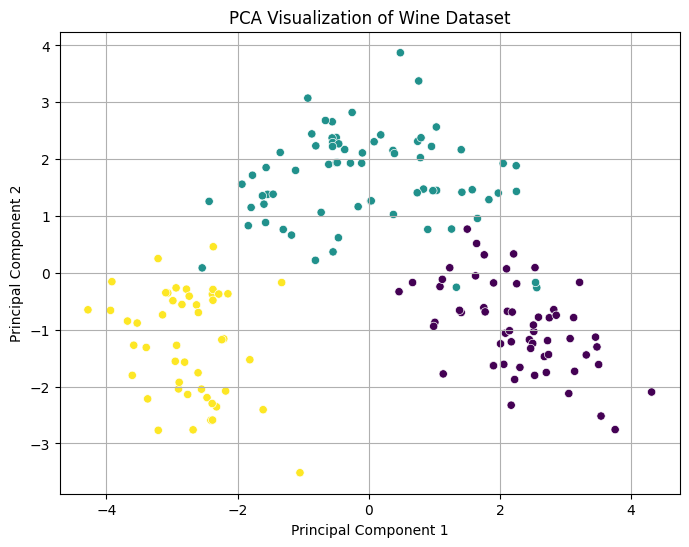

In [61]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x =X_pca[:,0], y=X_pca[:,1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Wine Dataset')
plt.grid(True)
plt.show()

## 

In [ ]:
## As an Aspiring ML Engineer, Here's What PCA Visualization Offers You :
#### Class Structure & Overlap
- If your wine samples (or any labeled data) cluster cleanly in PC1–PC2 space, that suggests your classes are naturally separable.
- Overlapping clusters may signal noise, or the need for better features or nonlinear techniques (like t-SNE or UMAP).
#### 